In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0e8357699fe3d44ff55e50a7f18a5649


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | finschhafen
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | yamasaki
Processing Record 6 of Set 1 | atka
City not found. Skipping...
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kampot
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | noumea
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | bolshoy tsaryn
City not found. Skipping...
Processing Record 19 of Set 1 | amapa
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | fortuna
P

Processing Record 32 of Set 4 | bonthe
Processing Record 33 of Set 4 | hailey
Processing Record 34 of Set 4 | kahului
Processing Record 35 of Set 4 | cedar city
Processing Record 36 of Set 4 | butembo
Processing Record 37 of Set 4 | colares
Processing Record 38 of Set 4 | aasiaat
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | fort nelson
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | umea
Processing Record 44 of Set 4 | foam lake
Processing Record 45 of Set 4 | trat
Processing Record 46 of Set 4 | kreminna
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | rafaela
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | baboua
City not found. Skipping...
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | smithers
Processing Record 4 of Set 5 | skalistyy
City not found. Skipping...
Process

Processing Record 22 of Set 8 | ondangwa
Processing Record 23 of Set 8 | yulara
Processing Record 24 of Set 8 | muros
Processing Record 25 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 26 of Set 8 | roswell
Processing Record 27 of Set 8 | deming
Processing Record 28 of Set 8 | berbera
Processing Record 29 of Set 8 | kucove
Processing Record 30 of Set 8 | morehead
Processing Record 31 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 32 of Set 8 | sakaiminato
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | norman wells
Processing Record 35 of Set 8 | bolshaya murta
City not found. Skipping...
Processing Record 36 of Set 8 | umm durman
City not found. Skipping...
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | mogadishu
Processing Record 39 of Set 8 | mabaruma
Processing Record 40 of Set 8 | tilsonburg
City not found. Skipping...
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 

Processing Record 11 of Set 12 | kingisepp
Processing Record 12 of Set 12 | jacareacanga
Processing Record 13 of Set 12 | jiddah
City not found. Skipping...
Processing Record 14 of Set 12 | kalmunai
Processing Record 15 of Set 12 | jiancheng
Processing Record 16 of Set 12 | mergui
City not found. Skipping...
Processing Record 17 of Set 12 | bacungan
Processing Record 18 of Set 12 | nador
Processing Record 19 of Set 12 | huntington
Processing Record 20 of Set 12 | tigil
Processing Record 21 of Set 12 | dudinka
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | calama
Processing Record 24 of Set 12 | purpe
Processing Record 25 of Set 12 | hamilton
Processing Record 26 of Set 12 | frederikssund
Processing Record 27 of Set 12 | wucheng
Processing Record 28 of Set 12 | hebertville
City not found. Skipping...
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | falmouth
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of S

In [30]:
len(city_data)

588

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Finschhafen,-6.6024,147.8681,81.77,77,99,1.90,PG,2022-01-20 22:43:46
1,Albany,42.6001,-73.9662,20.48,57,23,15.99,US,2022-01-20 22:40:46
2,Hobart,-42.8794,147.3294,71.02,61,0,1.01,AU,2022-01-20 22:43:47
3,Cape Town,-33.9258,18.4232,66.27,75,0,5.01,ZA,2022-01-20 22:42:50
4,Yamasaki,35.0000,134.5500,36.48,87,22,3.27,JP,2022-01-20 22:43:47
5,Tuktoyaktuk,69.4541,-133.0374,-22.00,76,75,14.97,CA,2022-01-20 22:43:48
6,Hilo,19.7297,-155.0900,78.80,69,75,10.36,US,2022-01-20 22:43:48
7,Rikitea,-23.1203,-134.9692,78.57,73,100,8.50,PF,2022-01-20 22:43:48
8,Kampot,10.6167,104.1833,71.65,83,18,2.33,KH,2022-01-20 22:43:49
9,Lorengau,-2.0226,147.2712,81.68,78,100,6.80,PG,2022-01-20 22:43:49


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:

city_data_df = city_data_df[["City","Country","Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Finschhafen,PG,2022-01-20 22:43:46,-6.6024,147.8681,81.77,77,99,1.90
1,Albany,US,2022-01-20 22:40:46,42.6001,-73.9662,20.48,57,23,15.99
2,Hobart,AU,2022-01-20 22:43:47,-42.8794,147.3294,71.02,61,0,1.01
3,Cape Town,ZA,2022-01-20 22:42:50,-33.9258,18.4232,66.27,75,0,5.01
4,Yamasaki,JP,2022-01-20 22:43:47,35.0000,134.5500,36.48,87,22,3.27
5,Tuktoyaktuk,CA,2022-01-20 22:43:48,69.4541,-133.0374,-22.00,76,75,14.97
6,Hilo,US,2022-01-20 22:43:48,19.7297,-155.0900,78.80,69,75,10.36
7,Rikitea,PF,2022-01-20 22:43:48,-23.1203,-134.9692,78.57,73,100,8.50
8,Kampot,KH,2022-01-20 22:43:49,10.6167,104.1833,71.65,83,18,2.33
9,Lorengau,PG,2022-01-20 22:43:49,-2.0226,147.2712,81.68,78,100,6.80


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

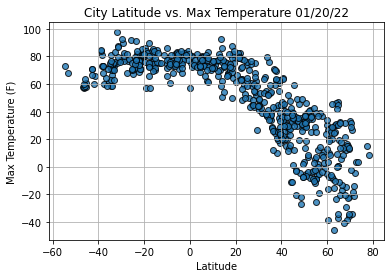

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

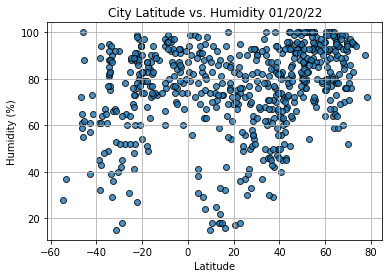

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

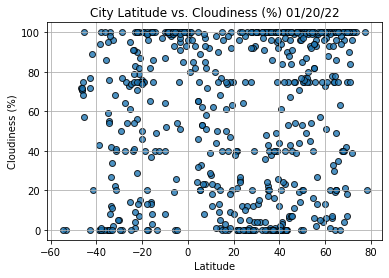

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

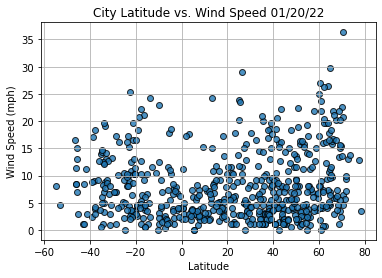

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress


In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

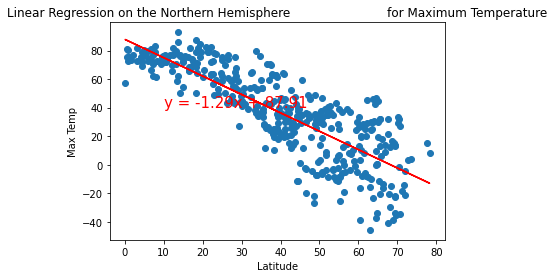

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

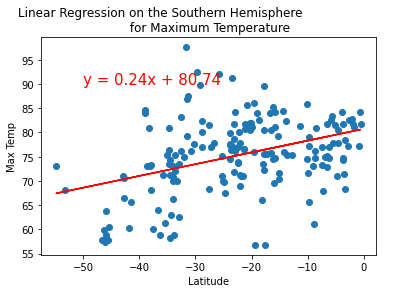

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Maximum Temperature', 'Max Temp',(-50,90))

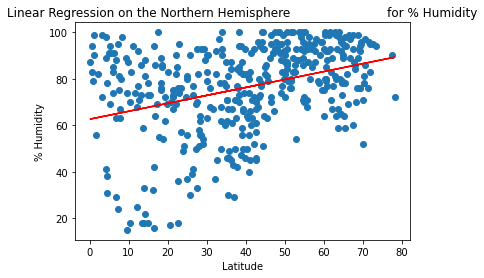

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

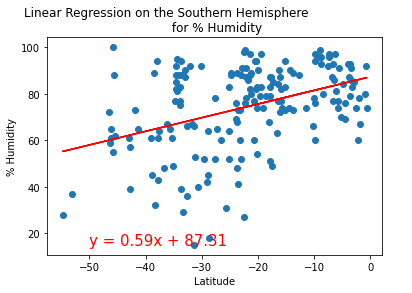

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Humidity', '% Humidity',(-50,15))

In [46]:
linregress(x_values,y_values)

LinregressResult(slope=0.5862264438214249, intercept=87.31413700612475, rvalue=0.40531021872612594, pvalue=1.998281364829475e-08, stderr=0.09966733773862664, intercept_stderr=2.5640638571513543)

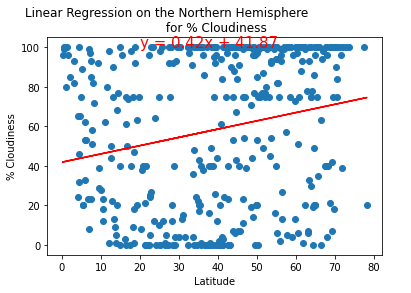

In [47]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(20,100))

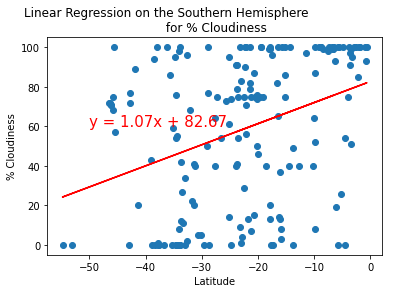

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(-50,60))

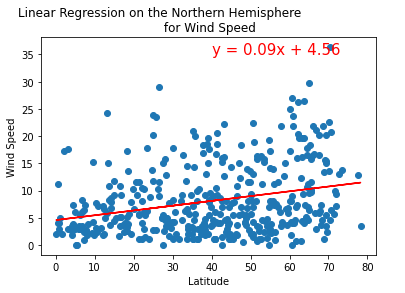

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(40,35))

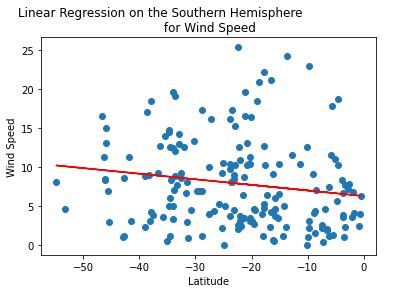

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(-50,35))